In [105]:
#Import all important libraries 


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

%matplotlib inline


In [6]:
#Dataframe 
df = pd.read_excel("data_level4.xlsx")

In [21]:
#Dict of all questions 
q = {'A5': 'ConfidentGetHealthInf', 
     'F1': 'GeneralHealth',
     'F2': 'OwnAbilityTakeCareHealth',
     'F3': 'AvoidDoc',
     'F5': 'TalkHealthFriends',
     'B14': ['IntRsn_VisitedSocNet','IntRsn_SharedSocNet','IntRsn_WroteBlog','IntRsn_SupportGroup','IntRsn_YouTube'],
     'N4': ['EverythingCauseCancer','PreventNotPossible','TooManyRecommendations']
    }

In [22]:
df.shape

(5438, 730)

In [23]:
#Do we have null values in dataset?
df.isnull().values.any()

True

In [44]:
# Preprocessing steps for dataset:
    #1. Removing all the columns after index 357. This includes all columns after `MAILNUM` column. 
    #2. Remove all the columns with object datatype. 
    #3. Remove all negative values

def preprocess_df(df):
  remove_df = df.iloc[:,359:]
  df = df.drop(remove_df.columns, axis=1)
  object_cols = list(df.select_dtypes(include=['object']).columns)
  print('Removing following columns', object_cols)
  date_cols = list(df.select_dtypes(include=['datetime']).columns)
  print('Removing following columns', date_cols)
  new_df = df.drop(object_cols, axis=1)
  new_df = new_df.drop(date_cols, axis=1)
                  
  print("New dataframe shape ", new_df.shape)              
  return new_df

In [30]:
df2 = preprocess_df(df)

Removing following columns ['PersonID', 'Stratum', 'APP_REGION', 'VAR_STRATUM', 'StrongNeedHealthInfo_OS', 'HealthIns_Other_OS', 'Caregiving_Other_OS', 'CaOther_OS', 'SexualOrientation_OS']
Removing following columns ['UpdateDate']
Removing column : Prompt . [P.S. This contains NaN]
New dataframe shape  (5438, 348)


In [31]:
#Do we have null values in dataset?
df2.isnull().values.any()

False

In [106]:
def create_bar_plot(df,col_ls_1,col_ls_2, figsize = (15,7)):
  temp = df[col_ls_2]
  temp.groupby(col_ls_1).count().plot(kind='bar', figsize = figsize)

def analyse_data(df,col_1, col_2, col_3):
  #removing the rows with missing data
  temp_df = df[df[col_1]>0]
  print("Shape after Filtering ",col_1," : ",temp_df.shape)

  #removing the rows with missing data
  temp_df_2 = temp_df[temp_df[col_2]>0]
  print("Shape after Filtering ",col_2," : ",temp_df_2.shape)
  res = temp_df_2.groupby([col_1,col_2]).count()
  print(res)
  create_bar_plot(temp_df_2, [col_1,col_2], [col_1,col_2, col_3])
  print('Done!!')

### Q: How do people’s information-related self-efficacy (A5) and their health-related self-efficacy (F2 & N4) relate to:

In [121]:
df3 = df2[:].copy()
df3.head()

,ConfidentGetHealthInf,OwnAbilityTakeCareHealth
0,3,4
1,3,3
2,2,3
3,3,2
4,1,2


In [122]:
q['A5']

'ConfidentGetHealthInf'

In [123]:
df3['ConfidentGetHealthInf'].value_counts()

2    1993
3    1537
1    1388
4     262
5     128
Name: ConfidentGetHealthInf, dtype: int64

In [124]:
df3['OwnAbilityTakeCareHealth'].value_counts()

 2    2390
 1    1386
 3    1195
 4     187
-9      71
 5      67
-7       9
-5       3
Name: OwnAbilityTakeCareHealth, dtype: int64

In [116]:
# remove any negatives
df3 = df3[(df3['ConfidentGetHealthInf'] > 0) & (df3['OwnAbilityTakeCareHealth'] > 0)]

In [117]:
# get pearson's correlation between A and F1
df3.corr()['ConfidentGetHealthInf']['OwnAbilityTakeCareHealth']

0.2961860764979685

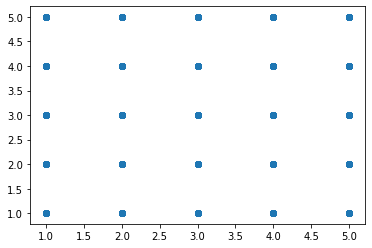

In [118]:
plt.scatter(df3['ConfidentGetHealthInf'], df3['OwnAbilityTakeCareHealth'])

In [92]:
q['N4']

['EverythingCauseCancer', 'PreventNotPossible', 'TooManyRecommendations']

In [94]:
df['EverythingCauseCancer'].value_counts()

 2    2407
 1    1169
 3    1004
 4     654
-9     161
-7      40
-5       3
Name: EverythingCauseCancer, dtype: int64

In [95]:
df['PreventNotPossible'].value_counts()

 3    1974
 4    1647
 2    1150
 1     413
-9     211
-7      40
-5       3
Name: PreventNotPossible, dtype: int64

In [96]:
df['TooManyRecommendations'].value_counts()

 2    2545
 1    1296
 3     905
 4     467
-9     181
-7      40
-5       4
Name: TooManyRecommendations, dtype: int64

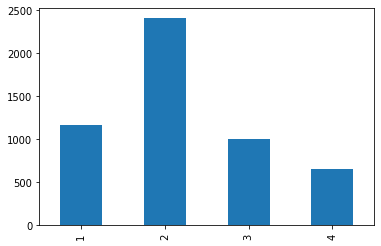

In [97]:
pd.value_counts(df[df['EverythingCauseCancer'] > 0]['EverythingCauseCancer']).sort_index().plot.bar()

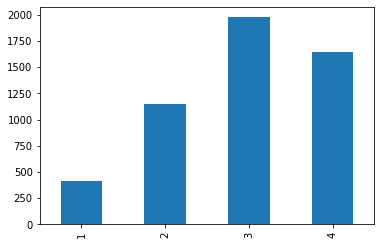

In [98]:
pd.value_counts(df[df['PreventNotPossible'] > 0]['PreventNotPossible']).sort_index().plot.bar()

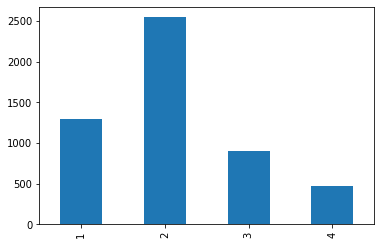

In [99]:
pd.value_counts(df[df['TooManyRecommendations'] > 0]['TooManyRecommendations']).sort_index().plot.bar()

ConfidentGetHealthInf: 3
Average causecancer: 2.181451612903226


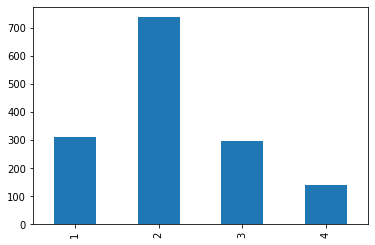

ConfidentGetHealthInf: 2
Average causecancer: 2.2753099173553717


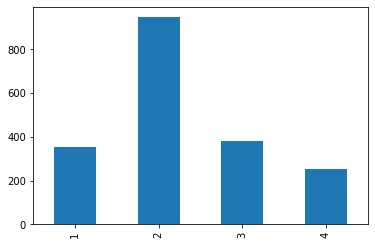

ConfidentGetHealthInf: 1
Average causecancer: 2.248312078019505


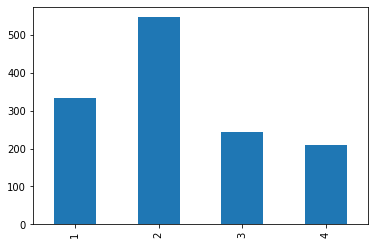

ConfidentGetHealthInf: 4
Average causecancer: 2.036734693877551


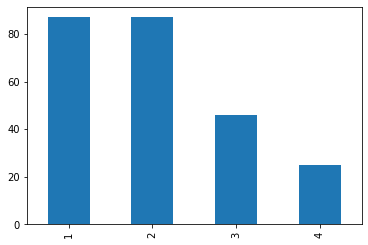

ConfidentGetHealthInf: 5
Average causecancer: 1.9572649572649572


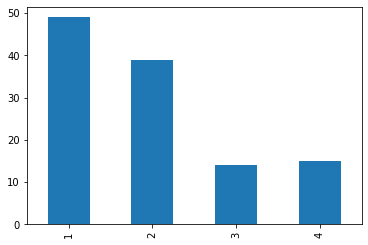

In [101]:
for place in df2q1['ConfidentGetHealthInf'].unique():
    print("ConfidentGetHealthInf: {}".format(place))
    this_place_df = df[df['ConfidentGetHealthInf'] == place]
    pd.value_counts(this_place_df[this_place_df['EverythingCauseCancer'] > 0]['EverythingCauseCancer']).sort_index().plot.bar()
    print("Average causecancer: {}".format(this_place_df[this_place_df['EverythingCauseCancer'] > 0]['EverythingCauseCancer'].mean()))
    plt.show()
    
    
    
    
    
    
overall_avg_health = df[df['ConfidentGetHealthInf']>0]['OwnAbilityTakeCareHealth'].mean()
print("Overall Avg Heath: {}".format(overall_avg_health))

for place in dfq1a['WhereSeekHealthInfo'].unique():
    print("WhereSeekHealthInfo: {}".format(place))
    this_place_df = df[df['WhereSeekHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['Frustrated'] > 0]['Frustrated']).sort_index().plot.bar()
    avg_frust = this_place_df[this_place_df['Frustrated'] > 0]['Frustrated'].mean()
    print("Average LotOfEffort: {}".format(avg_frust))
    print("Difference of avg to overall average: {}".format(avg_frust - overall_avg_frustrated))
    plt.show()

In [111]:
analyse_data(df2,'ConfidentGetHealthInf','OwnAbilityTakeCareHealth','EverythingCauseCancer')

Shape after Filtering  ConfidentGetHealthInf  :  (5308, 2)
Shape after Filtering  OwnAbilityTakeCareHealth  :  (5225, 2)
Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


KeyError: "['EverythingCauseCancer'] not in index"

In [126]:
#looking at if they had cancer and worried hood of getting cancer again 
p ={'M1': 'EverHadCancer', 
    'N2': 'FreWorryCancerNoDX'
   }

In [133]:
dp = pd.DataFrame(columns=[p['M1'],p['N2']]).copy()
dp.head()

,EverHadCancer,FreWorryCancerNoDX


In [132]:
dp['EverHadCancer'].value_counts()

Series([], Name: EverHadCancer, dtype: int64)